In [2]:
import numpy as np
import numpy.random as nrd
import matplotlib.pyplot as plt
from sklearn import tree
from collections import defaultdict

# Exercise 9.5

Degrees of freedom of a tree. Given data yi with mean f(xi) and
variance σ2, and a fitting operation $y \rightarrow \hat{y}$, let’s define the degrees of
freedom of a fit by $\sum_i cov(yi, \hat{y}i)/σ2$.

Consider a fit $\hat{y}$ estimated by a regression tree, fit to a set of predictors X1,X2, . . . ,Xp.

 - Generate 100 observations with predictors X1,X2, . . . ,X10 as independent standard Gaussian variates and fix these values.

 - Generate response values also as standard Gaussian (σ2 = 1), independent of the predictors. Fit regression trees to the data of fixed size 1,5 and 10 terminal nodes and hence estimate the degrees of freedom of each fit. (Do ten simulations of the response and average the results, to get a good estimate of degrees of freedom.)
 
# Solution

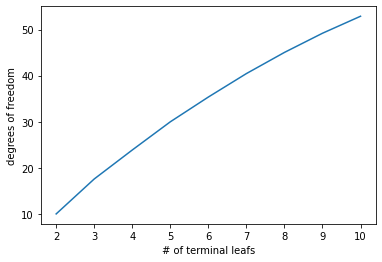

In [3]:
samples = 100
features = 10
simulations = 10
leafs = [2,3,4,5,6,7,8,9,10]

X = nrd.normal(size=(samples,features))

covs = defaultdict(list)

# Fit regression tree with different terminal nodes
for _ in range(simulations):
    y = nrd.normal(size=samples)
    for leaf in leafs:
        reg = tree.DecisionTreeRegressor(max_leaf_nodes=leaf)
        reg = reg.fit(X,y)
        y_exp = reg.predict(X)

        cov = (y - np.mean(y)) @ (y_exp - np.mean(y_exp))
        covs[leaf].append(cov)
        
dofs = [np.mean(covs[leaf]) for leaf in leafs]

plt.plot(leafs,dofs)
plt.xlabel('# of terminal leafs')
plt.ylabel('degrees of freedom')
plt.show()

The dofs of a tree seem to be linear in the # of terminal nodes.